<img src = "https://raw.githubusercontent.com/alvianfirdaus/Kelompok3_ML/main/Kuis%201/img/header.png"><p>

----

<table>
  <tr>
    <th>Nama Mata Kuliah </th>
    <td>Pembelajaran Mesin / Mechine Learning</td>
  </tr>
  <tr>
    <th>Topik</th>
    <td>UTS | Pertemuan 8 | Segmentasi Gambar menggunakan K means</td>
  </tr>
  <tr>
    <th>Dosen</th>
    <td>Muhammad Afif Hendawan, S.Kom., M.T. </td>
  </tr>
  <tr>
    <th>Kelompok</th>
    <td>Kelompok 3</td>
  </tr>
  <tr>
    <th>Nama Anggota Kelompok</th>
    <td><p>
    - Alvian Nur Firdaus<p>
    - Devi Andini Febrianti<p>
    - Febrian Dhani Ritonga<p>
    - Naresh Pratista<p>
    - Zahra Annisa Wahono<p></td>
  </tr>
  <tr>
    <th>Hasil Pengerjaan</th>
    <td><p>
    Alvian Nur Firdaus<p>
</td>
  </tr>
</table>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

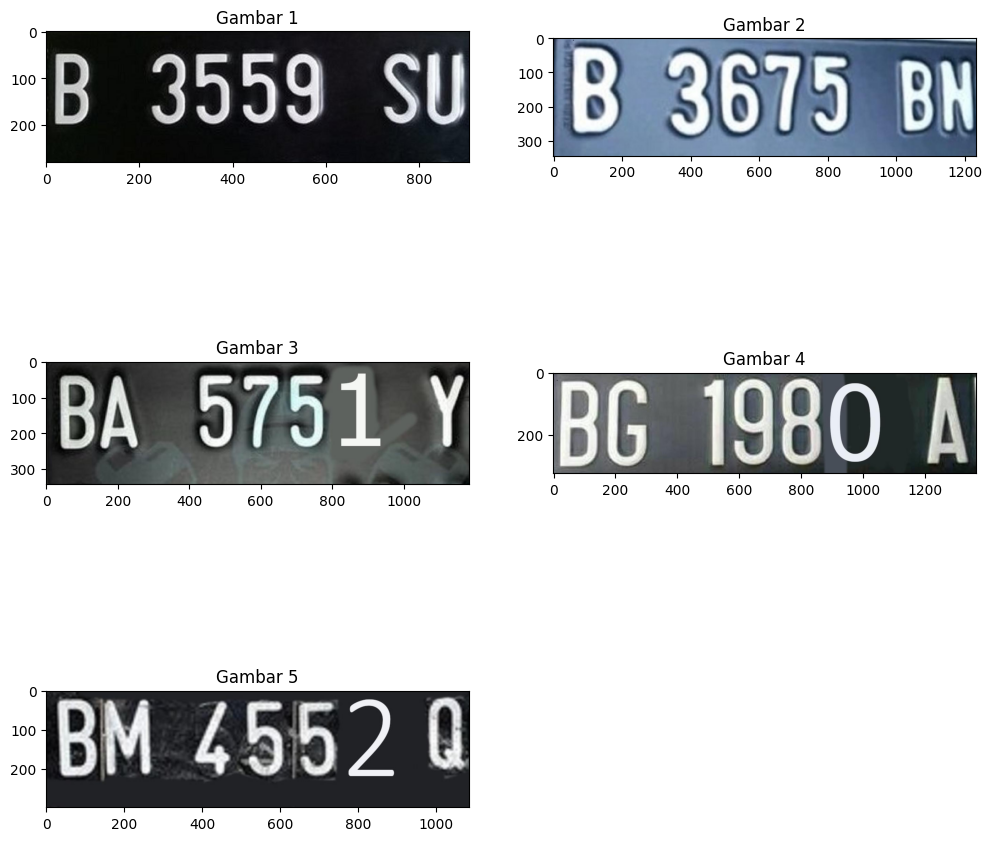

In [3]:
# Load Gambar
# Load Gambar
img_list = []

# Load and append each image to the list
img_1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/alvian/Salinan 24.jpg')
img_list.append(img_1)

img_2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/alvian/Salinan 26.jpg')
img_list.append(img_2)

img_3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/alvian/Salinan 29.jpg')
img_list.append(img_3)

img_4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/alvian/Salinan 38.jpg')
img_list.append(img_4)

img_5 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/alvian/Salinan 50.jpg')
img_list.append(img_5)

plt.figure(figsize=(12, 12))

for i, img in enumerate(img_list):
    plt.subplot(3, 2, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Gambar {i+1}")
    plt.axis('on')  # Optional, jika Anda ingin menghilangkan sumbu

plt.show()

In [4]:
h1, w1, ch1= img_1.shape
h2, w2, ch2= img_2.shape
h3, w3, ch3= img_3.shape
h4, w4, ch4= img_4.shape
h5, w5, ch5= img_5.shape
print(f"Image 1 : Height = {h1}, Width = {w1}, Channels = {ch1}")
print(f"Image 2 : Height = {h2}, Width = {w2}, Channels = {ch2}")
print(f"Image 3 : Height = {h3}, Width = {w3}, Channels = {ch3}")
print(f"Image 2 : Height = {h4}, Width = {w4}, Channels = {ch4}")
print(f"Image 3 : Height = {h5}, Width = {w4}, Channels = {ch5}")


Image 1 : Height = 281, Width = 908, Channels = 3
Image 2 : Height = 343, Width = 1233, Channels = 3
Image 3 : Height = 343, Width = 1183, Channels = 3
Image 2 : Height = 324, Width = 1366, Channels = 3
Image 3 : Height = 299, Width = 1366, Channels = 3


In [5]:

data_list = []  # Ini akan berisi data setiap gambar

def process_image(img):
    h, w, ch = img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)
    return data

# Loop untuk mengolah setiap gambar
for img in img_list:
    data = process_image(img)
    data_list.append(data)

# Data setiap gambar ada dalam data_list
for i, data in enumerate(data_list):
    print(f"Data untuk Gambar {i+1} Shape: {data.shape}")

# Data yang telah diolah dalam format data_1, data_2, dst.
data_1, data_2, data_3, data_4, data_5 = data_list

Data untuk Gambar 1 Shape: (255148, 3)
Data untuk Gambar 2 Shape: (422919, 3)
Data untuk Gambar 3 Shape: (405769, 3)
Data untuk Gambar 4 Shape: (442584, 3)
Data untuk Gambar 5 Shape: (324415, 3)


In [6]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

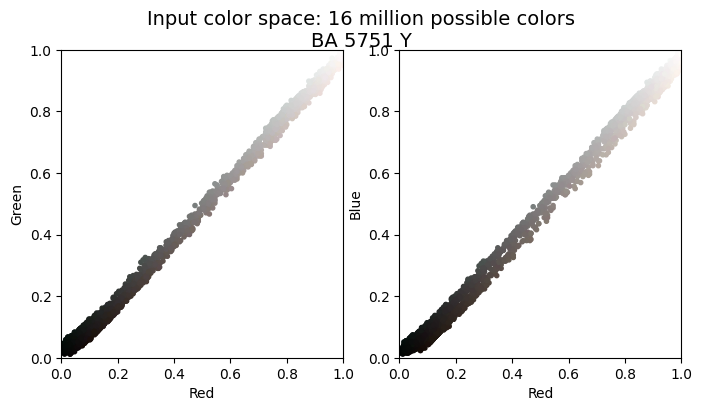

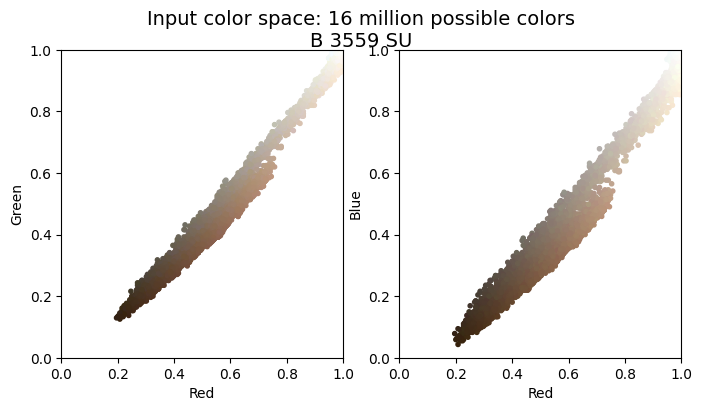

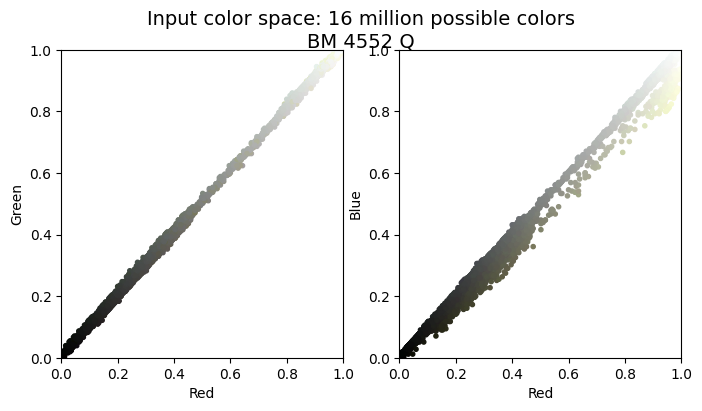

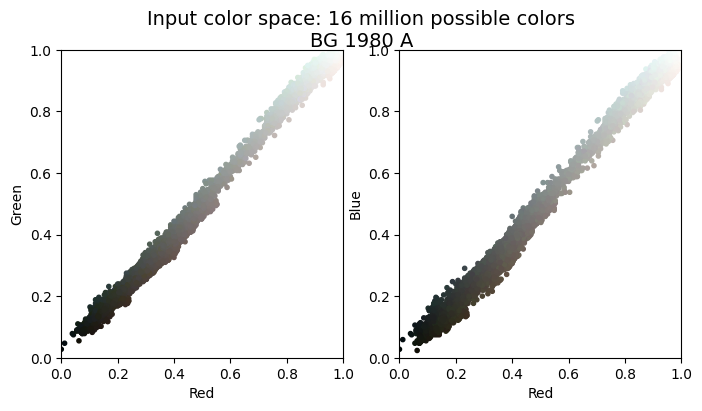

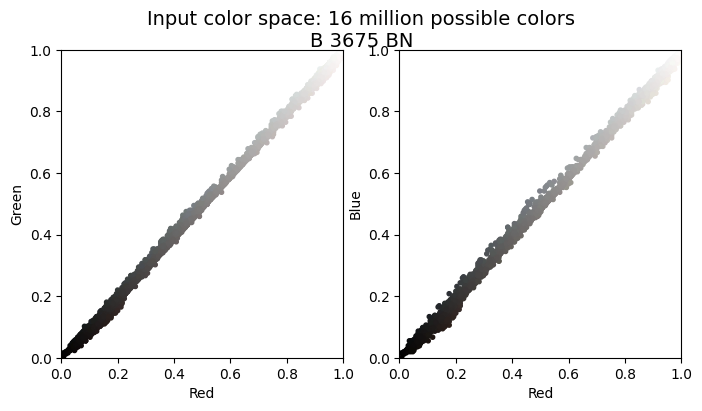

In [7]:
title = 'Input color space: 16 million possible colors'
description = 'BA 5751 Y'
plot_pixels(data_1, title + '\n' + description)

title = 'Input color space: 16 million possible colors'
description = 'B 3559 SU'
plot_pixels(data_2, title + '\n' + description)

title = 'Input color space: 16 million possible colors'
description = 'BM 4552 Q'
plot_pixels(data_3, title + '\n' + description)

title = 'Input color space: 16 million possible colors'
description = 'BG 1980 A'
plot_pixels(data_4, title + '\n' + description)

title = 'Input color space: 16 million possible colors'
description = 'B 3675 BN'
plot_pixels(data_5, title + '\n' + description)

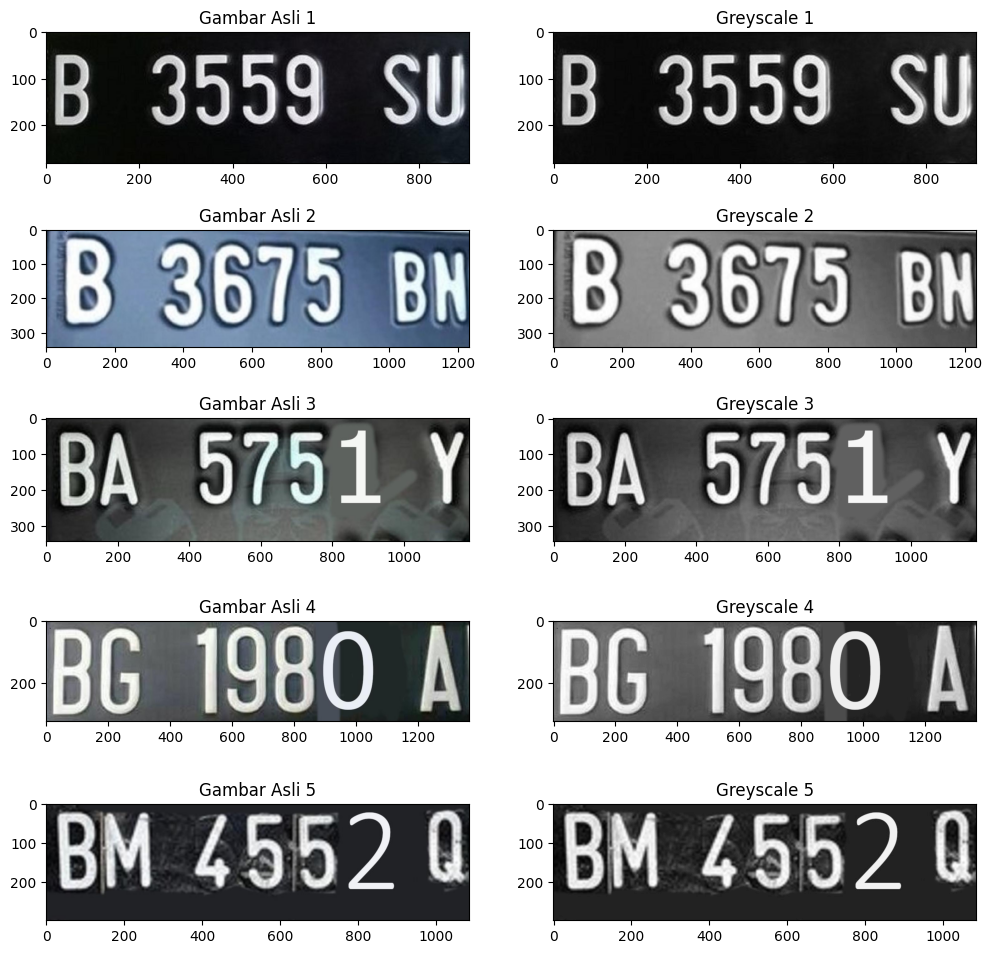

In [8]:
import cv2
import matplotlib.pyplot as plt

# Anda harus memiliki img_1 hingga img_5 sebelum menjalankan perulangan ini.
img_list = [img_1, img_2, img_3, img_4, img_5]

data_list = []


# Tentukan ukuran gambar
plt.figure(figsize=(12, 12))

# Loop untuk menampilkan perbandingan gambar
for i, img in enumerate(img_list):
    # Konversi citra ke citra skala abu-abu
    grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Tampilkan gambar asli di sebelah kiri
    plt.subplot(5, 2, i*2+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Gambar Asli {i+1}")
    plt.axis('on')

    # Tampilkan citra skala abu-abu di sebelah kanan
    plt.subplot(5, 2, i*2+2)
    plt.imshow(grey_image, cmap='gray')
    plt.title(f"Greyscale {i+1}")
    plt.axis('on')
    data_list.append(grey_image)


plt.show()


OPSIONAL INGAT

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

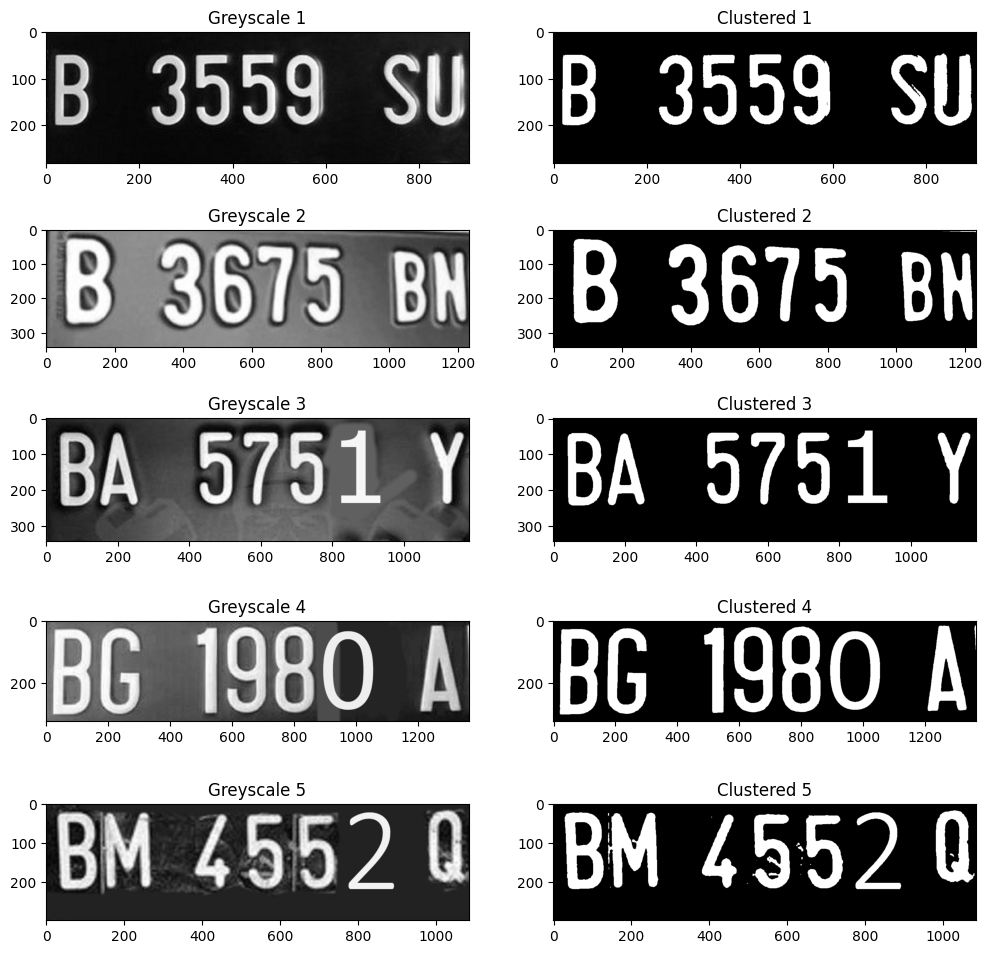

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


# Anda harus memiliki img_1 hingga img_5 sebelum menjalankan perulangan ini.
# img_list = [img_1, img_2, img_3, img_4, img_5]

data_list_cl = []  # Ini akan berisi data setiap gambar

# # Tentukan ukuran gambar
# plt.figure(figsize=(12, 12))

# # Loop untuk menampilkan perbandingan gambar
# for i, img in enumerate(img_list):
#     # Konversi citra ke citra skala abu-abu
#     grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Tampilkan gambar asli di sebelah kiri
#     plt.subplot(5, 2, i*2+1)
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.title(f"Gambar Asli {i+1}")
#     plt.axis('on')

#     # Tampilkan citra skala abu-abu di sebelah kanan
#     plt.subplot(5, 2, i*2+2)
#     plt.imshow(grey_image, cmap='gray')
#     plt.title(f"Greyscale {i+1}")
#     plt.axis('on')

#     # Tambahkan data citra skala abu-abu ke dalam daftar
#     data_list.append(grey_image)

# plt.show()

# Sekarang, data_list berisi data citra skala abu-abu

# Melakukan K-Means Clustering pada citra-citra skala abu-abu
# Contoh dengan 2 cluster
num_clusters = 2  # Jumlah cluster yang Anda inginkan
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clustered_data = []

for data in data_list:
    h, w = data.shape
    flattened_data = data.reshape(-1, 1)  # Mengubah citra menjadi vektor 1D
    kmeans.fit(flattened_data)
    clustered_img = kmeans.cluster_centers_[kmeans.labels_].reshape(h, w)
    clustered_data.append(clustered_img)

# Menampilkan hasil clustering
plt.figure(figsize=(12, 12))
for i, clustered_img in enumerate(clustered_data):
    plt.subplot(5, 2, i*2+1)
    plt.imshow(data_list[i], cmap='gray')
    plt.title(f"Greyscale {i+1}")
    plt.axis('on')

    plt.subplot(5, 2, i*2+2)
    plt.imshow(clustered_img,cmap='gray')
    plt.title(f"Clustered {i+1}")
    plt.axis('on')
    data_list_cl.append(clustered_img)

plt.show()



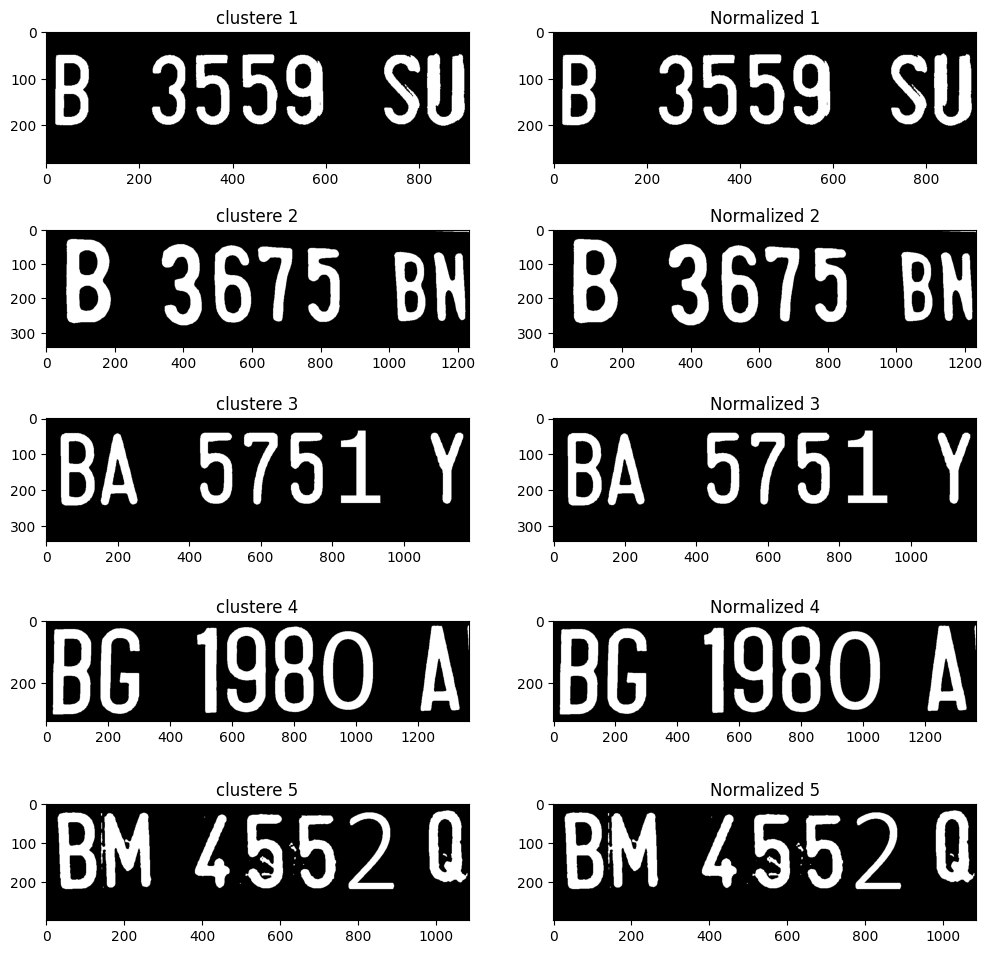

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ... (kode sebelumnya) ...

# Normalisasi hasil clustered
normalized_data_list_cl = []

for clustered_img in clustered_data:
    # Konversi citra hasil clustered ke skala keabuan (0-255)
    normalized_img = ((clustered_img - clustered_img.min()) / (clustered_img.max() - clustered_img.min()) * 255).astype(np.uint8)

    # Konversi citra ke mode BGR agar dapat diakses oleh OCR
    bgr_img = cv2.cvtColor(normalized_img, cv2.COLOR_GRAY2BGR)

    normalized_data_list_cl.append(bgr_img)

# Menampilkan hasil normalisasi
plt.figure(figsize=(12, 12))
for i, normalized_img in enumerate(normalized_data_list_cl):
    plt.subplot(5, 2, i*2+1)
    plt.imshow(data_list_cl[i], cmap='gray')
    plt.title(f"clustere {i+1}")
    plt.axis('on')

    plt.subplot(5, 2, i*2+2)
    plt.imshow(normalized_img, cmap='gray')
    plt.title(f"Normalized {i+1}")
    plt.axis('on')

plt.show()


### **HASIL EVALUASI**

In [12]:
!pip install pytesseract

In [13]:
import pytesseract

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 24.9 MB/s eta 0:00:00


In [16]:
!pip install pytesseract
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,537 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [17]:
import pytesseract
from PIL import Image

# Pastikan 'data_list_cl' telah diimpor atau didefinisikan dengan benar sebelumnya

# Membaca citra gambar dari 'data_list_cl[0]' dan mengonversinya ke mode 'RGB'
img = Image.fromarray(normalized_data_list_cl[0]).convert('RGB')
# img = Image.fromarray(data_list_cl[1]).convert('RGB')

# Melakukan OCR untuk mengenali karakter pada gambar
recognized_text = pytesseract.image_to_string(img, lang='eng')  # Anda dapat mengganti 'eng' dengan bahasa yang sesuai

# Ground Truth
ground_truth = 'B 3559 SU'

# Menghitung akurasi pengenalan karakter
def calculate_accuracy(ground_truth, recognized_text):
    correct_characters = sum(1 for gt_char, rec_char in zip(ground_truth, recognized_text) if gt_char == rec_char)
    total_characters = len(ground_truth)
    accuracy = correct_characters / total_characters * 100.0
    return accuracy

# Menghitung akurasi
accuracy = calculate_accuracy(ground_truth, recognized_text)

# Menampilkan hasil
print(f'Teks yang diakui: {recognized_text}')
print(f'Ground Truth: {ground_truth}')
print(f'Akurasi: {accuracy:.2f}%')


Teks yang diakui: B 3599 SU

Ground Truth: B 3559 SU
Akurasi: 88.89%


In [ ]:
import pytesseract
from PIL import Image

# Pastikan 'data_list_cl' telah diimpor atau didefinisikan dengan benar sebelumnya

# Membaca citra gambar dari 'data_list_cl[0]' dan mengonversinya ke mode 'RGB'
img = Image.fromarray(normalized_data_list_cl[1]).convert('RGB')
# img = Image.fromarray(data_list_cl[1]).convert('RGB')

# Melakukan OCR untuk mengenali karakter pada gambar
recognized_text = pytesseract.image_to_string(img, lang='eng')  # Anda dapat mengganti 'eng' dengan bahasa yang sesuai

# Ground Truth
ground_truth = 'B 3675 BN'

# Menghitung akurasi pengenalan karakter
def calculate_accuracy(ground_truth, recognized_text):
    correct_characters = sum(1 for gt_char, rec_char in zip(ground_truth, recognized_text) if gt_char == rec_char)
    total_characters = len(ground_truth)
    accuracy = correct_characters / total_characters * 100.0
    return accuracy

# Menghitung akurasi
accuracy = calculate_accuracy(ground_truth, recognized_text)

# Menampilkan hasil
print(f'Teks yang diakui: {recognized_text}')
print(f'Ground Truth: {ground_truth}')
print(f'Akurasi: {accuracy:.2f}%')


Teks yang diakui: B 3675 BN

Ground Truth: B 3675 BN
Akurasi: 100.00%


In [ ]:
import pytesseract
from PIL import Image

# Pastikan 'data_list_cl' telah diimpor atau didefinisikan dengan benar sebelumnya

# Membaca citra gambar dari 'data_list_cl[0]' dan mengonversinya ke mode 'RGB'
img = Image.fromarray(normalized_data_list_cl[2]).convert('RGB')
# img = Image.fromarray(data_list_cl[1]).convert('RGB')

# Melakukan OCR untuk mengenali karakter pada gambar
recognized_text = pytesseract.image_to_string(img, lang='eng')  # Anda dapat mengganti 'eng' dengan bahasa yang sesuai

# Ground Truth
ground_truth = 'B 5751 Y'

# Menghitung akurasi pengenalan karakter
def calculate_accuracy(ground_truth, recognized_text):
    correct_characters = sum(1 for gt_char, rec_char in zip(ground_truth, recognized_text) if gt_char == rec_char)
    total_characters = len(ground_truth)
    accuracy = correct_characters / total_characters * 100.0
    return accuracy

# Menghitung akurasi
accuracy = calculate_accuracy(ground_truth, recognized_text)

# Menampilkan hasil
print(f'Teks yang diakui: {recognized_text}')
print(f'Ground Truth: {ground_truth}')
print(f'Akurasi: {accuracy:.2f}%')


Teks yang diakui: BA o/7ol Y

Ground Truth: B 5751 Y
Akurasi: 12.50%


In [ ]:
import pytesseract
from PIL import Image

# Pastikan 'data_list_cl' telah diimpor atau didefinisikan dengan benar sebelumnya

# Membaca citra gambar dari 'data_list_cl[0]' dan mengonversinya ke mode 'RGB'
img = Image.fromarray(normalized_data_list_cl[3]).convert('RGB')
# img = Image.fromarray(data_list_cl[1]).convert('RGB')

# Melakukan OCR untuk mengenali karakter pada gambar
recognized_text = pytesseract.image_to_string(img, lang='eng')  # Anda dapat mengganti 'eng' dengan bahasa yang sesuai

# Ground Truth
ground_truth = 'BG 1980 A'

# Menghitung akurasi pengenalan karakter
def calculate_accuracy(ground_truth, recognized_text):
    correct_characters = sum(1 for gt_char, rec_char in zip(ground_truth, recognized_text) if gt_char == rec_char)
    total_characters = len(ground_truth)
    accuracy = correct_characters / total_characters * 100.0
    return accuracy

# Menghitung akurasi
accuracy = calculate_accuracy(ground_truth, recognized_text)

# Menampilkan hasil
print(f'Teks yang diakui: {recognized_text}')
print(f'Ground Truth: {ground_truth}')
print(f'Akurasi: {accuracy:.2f}%')


Teks yang diakui:  

Ground Truth: BG 1980 A
Akurasi: 0.00%


In [ ]:
import pytesseract
from PIL import Image

# Pastikan 'data_list_cl' telah diimpor atau didefinisikan dengan benar sebelumnya

# Membaca citra gambar dari 'data_list_cl[0]' dan mengonversinya ke mode 'RGB'
img = Image.fromarray(normalized_data_list_cl[4]).convert('RGB')
# img = Image.fromarray(data_list_cl[1]).convert('RGB')

# Melakukan OCR untuk mengenali karakter pada gambar
recognized_text = pytesseract.image_to_string(img, lang='eng')  # Anda dapat mengganti 'eng' dengan bahasa yang sesuai

# Ground Truth
ground_truth = 'BM 4552Q'

# Menghitung akurasi pengenalan karakter
def calculate_accuracy(ground_truth, recognized_text):
    correct_characters = sum(1 for gt_char, rec_char in zip(ground_truth, recognized_text) if gt_char == rec_char)
    total_characters = len(ground_truth)
    accuracy = correct_characters / total_characters * 100.0
    return accuracy

# Menghitung akurasi
accuracy = calculate_accuracy(ground_truth, recognized_text)

# Menampilkan hasil
print(f'Teks yang diakui: {recognized_text}')
print(f'Ground Truth: {ground_truth}')
print(f'Akurasi: {accuracy:.2f}%')


Teks yang diakui: BM 4552 Q

Ground Truth: BM 4552Q
Akurasi: 87.50%


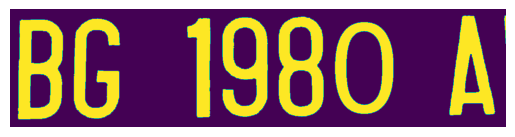

In [ ]:
import matplotlib.pyplot as plt

# Citra yang ingin ditampilkan
image_to_display = data_list_cl[3]

# Menampilkan citra
plt.imshow(image_to_display)
plt.imshow(image_to_display) # Ganti 'gray' sesuai dengan colormap yang sesuai jika perlu
plt.axis('off')  # Matikan sumbu (opsional)
plt.show()


Hasil Evaluasi tanpa Segmentasi

In [19]:
import pytesseract
from PIL import Image

# Pastikan 'data_list_cl' telah diimpor atau didefinisikan dengan benar sebelumnya

# Membaca citra gambar dari 'data_list_cl[0]' dan mengonversinya ke mode 'RGB'
img = Image.fromarray(data_list[1]).convert('RGB')
# img = Image.fromarray(data_list_cl[1]).convert('RGB')

# Melakukan OCR untuk mengenali karakter pada gambar
recognized_text = pytesseract.image_to_string(img, lang='eng')  # Anda dapat mengganti 'eng' dengan bahasa yang sesuai

# Ground Truth
ground_truth = 'B 3675 BN'

# Menghitung akurasi pengenalan karakter
def calculate_accuracy(ground_truth, recognized_text):
    correct_characters = sum(1 for gt_char, rec_char in zip(ground_truth, recognized_text) if gt_char == rec_char)
    total_characters = len(ground_truth)
    accuracy = correct_characters / total_characters * 100.0
    return accuracy

# Menghitung akurasi
accuracy = calculate_accuracy(ground_truth, recognized_text)

# Menampilkan hasil
print(f'Teks yang diakui: {recognized_text}')
print(f'Ground Truth: {ground_truth}')
print(f'Akurasi: {accuracy:.2f}%')


Teks yang diakui: Vell

Ground Truth: B 3675 BN
Akurasi: 0.00%
